In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [4]:
US_df = pd.read_csv("US2021.csv", index_col=0)
US_df.head()

,title,score,id,url,coms_num,author,upvotes
0,St. Paul ‘sovereign citizen’ records himself s...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764
1,District keeps kids at home because of lack of...,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73
2,Tacoma man says he was stabbed after asking so...,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660
3,Israeli air strike destroys Gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342
4,Elon Musk says Tesla will stop accepting bitco...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068


In [40]:
titles = " ".join(US_df["title"])
words = word_tokenize(titles)

In [42]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [43]:
lowered = clean_words(words)

In [48]:
bow = Counter(lowered)

In [50]:
data = pd.DataFrame(bow.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)

In [51]:
data = data.head(30)

<AxesSubplot:xlabel='frequency', ylabel='word'>

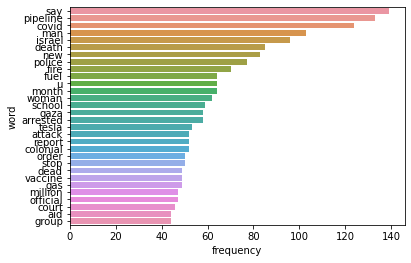

In [52]:
sns.barplot(x="frequency", y="word", data=data)

In [15]:
World_df = pd.read_csv("World2021.csv", index_col=0)
World_df.head()

,title,score,id,url,coms_num,author,upvotes
0,Bosnian Serb ex-leader Karadzic to serve genoc...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44
1,Taiwan computer brand wiped from mainland Chin...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32
2,"""A Hell Out Here"": COVID-19 Ravages Rural India",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11
3,Federal budget 2021: Foreign aid cut against n...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3
4,Weary Gaza marks Muslim feast as violence spre...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17


In [55]:
titles = " ".join(World_df["title"])
words = word_tokenize(titles)

In [56]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [57]:
lowered = clean_words(words)

In [58]:
bow = Counter(lowered)

In [59]:
data = pd.DataFrame(bow.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)

In [60]:
data = data.head(30)

<AxesSubplot:xlabel='frequency', ylabel='word'>

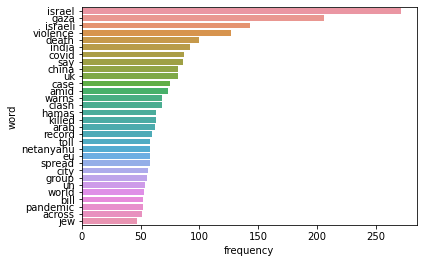

In [61]:
sns.barplot(x="frequency", y="word", data=data)

In [7]:
def word_frequency(sentence):
    sentence = " ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))
    bigrams = pd.DataFrame(counted_2.items(), columns=["bigrams", "frequency"]).sort_values(by="frequency", ascending=False)
    trigrams = pd.DataFrame(counted_3.items(), columns=["trigrams", "frequency"]).sort_values(by="frequency", ascending=False)
    return bigrams, trigrams

In [16]:
data2, data3 = word_frequency(World_df['title'])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

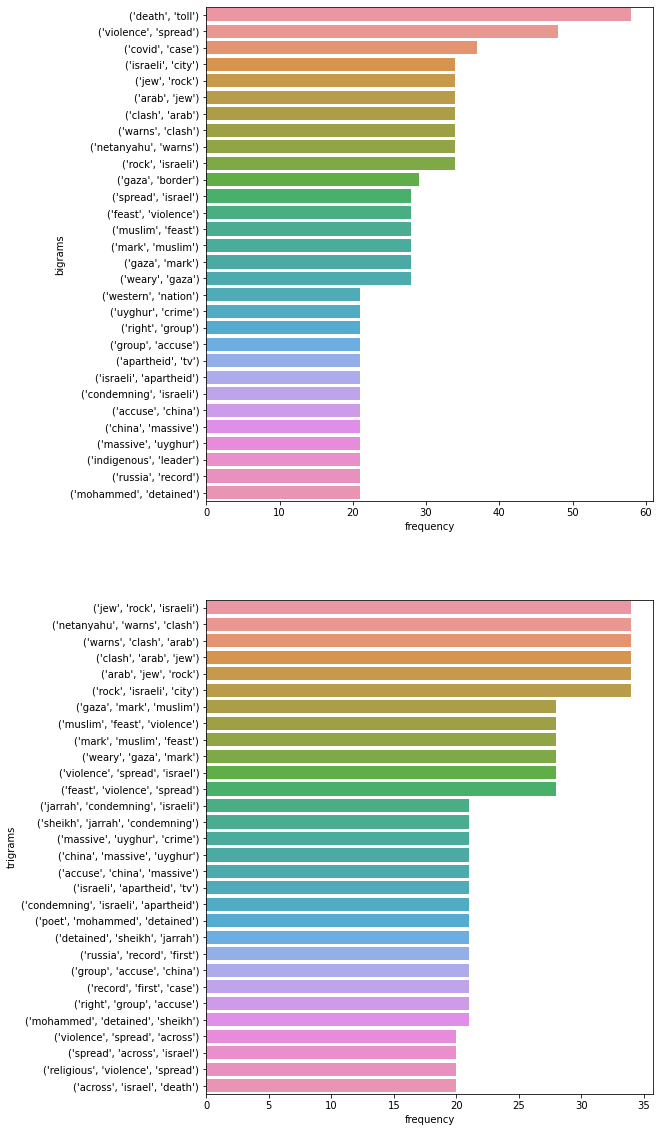

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(8,20))
sns.barplot(ax=axes[0], x='frequency', y='bigrams', data=data2.head(30))
sns.barplot(ax=axes[1], x='frequency', y='trigrams', data=data3.head(30))


In [ ]:
reddit = praw.Reddit(client_id='pUBdCmRMoXbboA',
                        client_secret='dbY5VCYAyuno7ch7S0TeAmUPdBtMYA',
                        user_agent='INST447',
                        username='Fit_Veterinarian_651')
 
world_news = reddit.subreddit('worldnews')


elements_dict = {"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
                "timestamp":[],\
                "day":[],\
                "hour":[],\
                "dayofweek":[],\
               }

x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = world_news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1618963200:
        elements_dict["title"].append(post.title)
        elements_dict["score"].append(post.score)
        elements_dict["id"].append(post.id)
        elements_dict["url"].append(post.url)
        elements_dict["coms_num"].append(post.url)
        elements_dict["author"].append(post.author)
        elements_dict["upvotes"].append(post.ups)
        elements_dict["timestamp"].append(post.)
        elements_dict["day"].append(post.)
        elements_dict["hour"].append(post.ups)
        
        
WN_df = pd.DataFrame(data=elements_dict)
WN_df